<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/Class_kernel_Dual_of_SVM_hard_constraint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyomo
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Kernel SVM.csv')
df

,x1,x2,y
0,0.364095,-0.817517,1
1,0.069706,-0.951712,1
2,0.892083,-0.401552,1
3,0.941956,0.688560,-1
4,-0.395373,0.956094,-1
5,0.057090,-0.482312,1
6,0.488186,-0.641564,1
7,0.067678,-0.667084,1
8,0.138012,-0.805460,1
9,-0.541123,0.830253,1


"\nn = 10\ndf = pd.DataFrame()\nred = [1 for i in range(n)]\ngreen = [-1 for i in range(n)]\n\ndf['f1'] = [np.random.randint(3, 15) for n in range(n) ] + [np.random.randint(1, 7) for n in range(n) ]\ndf['f2'] = [np.random.randint(3, 15) for n in range(n)] + [np.random.randint(1, 7) for n in range(n)]\ndf['y'] = red+green\ndf\n"

In [ ]:
!wget -N -q "https://github.com/thomasfork/ipopt_linux/raw/main/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

opt = SolverFactory('ipopt', executable='/content/ipopt')

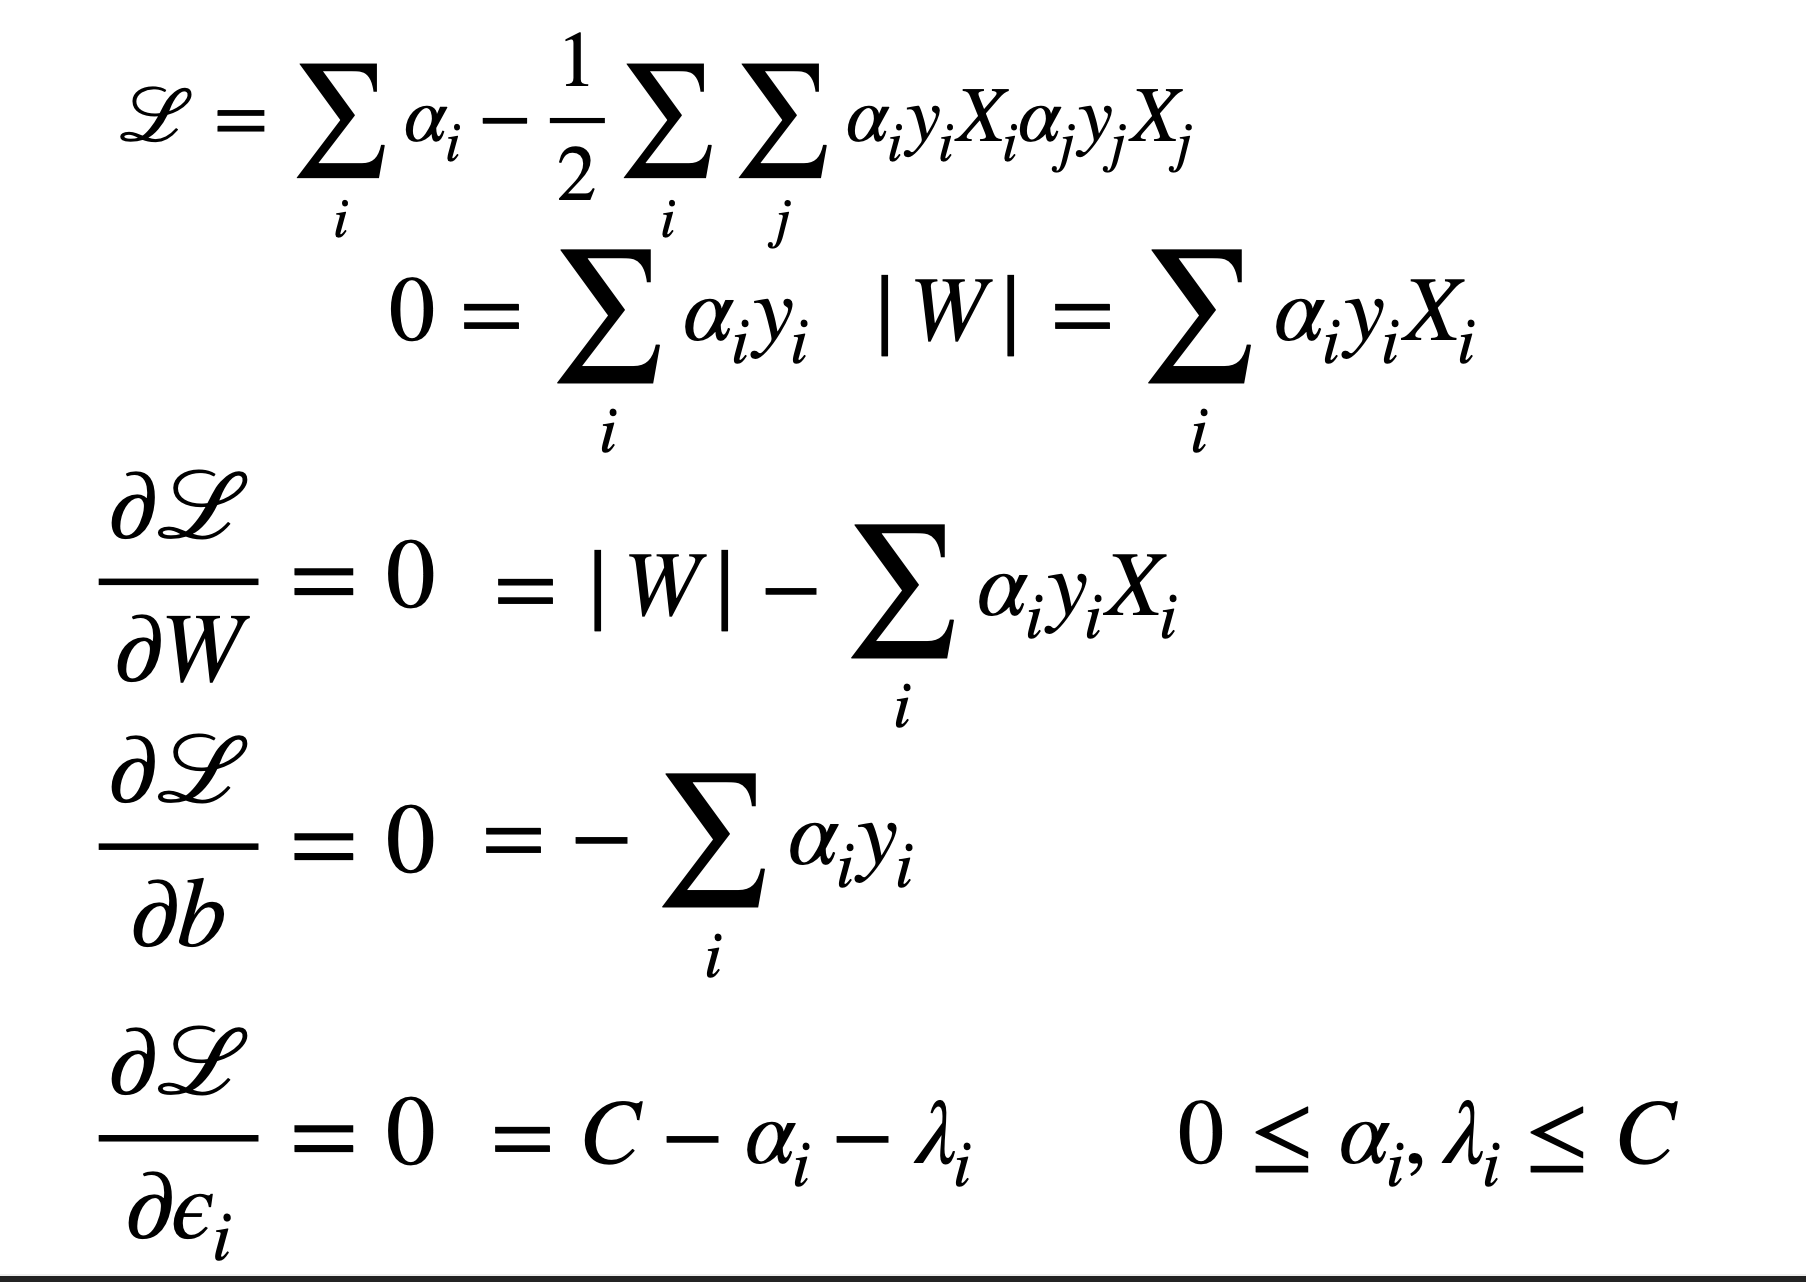

In [ ]:
model = AbstractModel()
model.i = RangeSet(len(df))
features = [f for f in df.columns if f not in ['y'] ]
C = 100
model.alpha = Var(model.i, bounds=(0,100), within = Reals)
model.L = Var(model.i,bounds=(0,100), within = Reals)

def rule_c1(model):
  return sum(df['y'][i-1]*model.alpha[i] for i in model.i) ==0
model.C1 = Constraint( rule = rule_c1)

def rule_c2(model,i):
  return model.alpha[i] + model.L[i] ==C
model.C2 = Constraint(model.i, rule = rule_c2)

def kernel(i,j):
  # (1+Xi*Xj)^2
  return (1+sum(df.loc[i-1,f]*df.loc[j-1,f] for f in features))**2

def rule_obj(model):
  expr = sum(model.alpha[i]*model.alpha[j]*df['y'][i-1]*df['y'][j-1]*kernel(i,j) for i in model.i for j in model.i)
  return sum(model.alpha[i] for i in model.i) -0.5*expr
model.obj = Objective(rule = rule_obj, sense = maximize)
instance = model.create_instance()
results = opt.solve(instance)


from pyomo.opt import SolverStatus, TerminationCondition
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
     print ("this is optimal")
elif results.solver.termination_condition == TerminationCondition.infeasible:
     print ("do something about it? or exit?")
else:
     print ('ERROR ' + str(results.solver))

# CPLEX
# Gurobi
# Mosek (maybe)

svm_points = []
for i in model.i:
  print(i, value(instance.alpha[i]), value(instance.L[i]))
  if value(instance.alpha[i]) > 0.1 and value(instance.L[i]) >0.1:
    svm_points.append(i)
print(svm_points)


this is optimal
1 0.0 100.0
2 0.0 100.0
3 57.27563647163788 42.72436352836212
4 0.0 100.0
5 0.0 100.0
6 0.0 100.0
7 0.0 100.0
8 0.0 100.0
9 0.0 100.0
10 100.0 0.0
11 0.0 100.0
12 0.0 100.0
13 0.0 100.0
14 0.0 100.0
15 0.0 100.0
16 4.094785202759253e-09 99.99999999590521
17 0.0 100.0
18 100.0 0.0
19 0.0 100.0
20 0.0 100.0
21 19.54625624995872 80.45374375004128
22 0.0 100.0
23 99.99999988192309 1.1807690715126403e-07
24 47.623539842818204 52.376460157181796
25 0.0 100.0
26 0.0 100.0
27 0.0 100.0
28 100.0 0.0
29 0.0 100.0
30 0.0 100.0
31 0.0 100.0
32 0.0 100.0
33 1.0407408805465453e-08 99.99999998959258
34 0.0 100.0
35 0.0 100.0
36 0.0 100.0
37 93.36882208941168 6.63117791058832
38 0.0 100.0
39 0.0 100.0
40 0.0 100.0
41 0.0 100.0
42 0.0 100.0
43 11.13851799521891 88.86148200478108
44 0.0 100.0
45 0.0 100.0
46 19.938092103391625 80.06190789660837
47 0.0 100.0
48 2.7545145716434763e-08 99.99999997245484
49 0.0 100.0
[3, 21, 24, 37, 43, 46]


$$f = \sum_i \alpha_i k(X_i,x) y_i +b$$

In [ ]:
j = 21
b = df.loc[j-1,'y'] - sum(value(instance.alpha[i])*kernel(i,j)*df.loc[i-1,'y'] for i in instance.i)
print(b,df.loc[j-1,'y'] )

j = 46
b = df.loc[j-1,'y'] - sum(value(instance.alpha[i])*kernel(i,j)*df.loc[i-1,'y'] for i in instance.i)
print(b,df.loc[j-1,'y'] )


j = 24
b = df.loc[j-1,'y'] - sum(value(instance.alpha[i])*kernel(i,j)*df.loc[i-1,'y'] for i in instance.i)
print(b,df.loc[j-1,'y'] )


9.772935211408335 1
9.77293513741383 -1
9.772935116707165 1


[0.16393484995728436, 0.19672182348054726]


In [ ]:
i = 2
i = 19
b = df.loc[i-1,'y'] - W[0]*df.loc[i-1,'f1'] - W[1]*df.loc[i-1,'f2']
print(b)


-2.4426266937513263
